In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pdb;

In [2]:
L = 8
W = 8
H = 12

In [3]:
# state_space = np.zeros((L*W*H,3))
state_space = []
i=0
for h in range(H):
    for y in range(W):
        for x in range(L):
            state_space.append([x,y,h])
            i=i+1
print(len(state_space))

768


In [4]:
rotate_actions = [-1,0,1]
linear_actions = [-1,0,1]
action_space = []
action_space.append([0,0])
for ra in rotate_actions:
    for la in linear_actions:
        if la!=0:
            action_space.append([la,ra])

action_space = (action_space)          
print(action_space)

[[0, 0], [-1, -1], [1, -1], [-1, 0], [1, 0], [-1, 1], [1, 1]]


In [5]:
def get_translation(h):
    h = h % H
    if h in [11,0,1]:
        t = [0,1]
    elif h in [2,3,4]:
        t = [1,0]
    elif h in [5,6,7]:
        t = [0,-1]
    elif h in [8,9,10]:
        t = [-1,0]
    else:
        1/0
    return t

def is_outside_grid(x,y):
    if x <0 or x>=L or y < 0 or y>=W:
        return True
    else:
        return False    

def calc_prob_sa_to_sd(pe,s,a,sd):
    x,y,h = s
    xd,yd,hd = sd
    la,ra = a
    
    p = 0 
    
    if la == 0:
        possible_sd = s
        if np.all(s == sd):
            p = 1.0
    elif la in [1,-1]:
        if la == -1:
            ht = (h + 6)%H
        else:
            ht = h
        dx_ideal,dy_ideal =  get_translation(ht)
        dx_plus,dy_plus =  get_translation(ht+1)
        dx_minus,dy_minus =  get_translation(ht-1)
#         import pdb; pdb.set_trace()
        if xd == x + dx_ideal and yd == y + dy_ideal:
            if hd == (h + ra) %H:
                p = 1 - 2 * pe
        elif xd == x + dx_plus and yd == y + dy_plus:
            if hd == (h + 1 + ra) %H:
                p = pe
        elif xd == x + dx_minus and yd == y + dy_minus:
            if hd == (h - 1 + ra) %H:
                p = pe
        elif xd ==x and yd==y:
            if is_outside_grid(x + dx_ideal,y + dy_ideal):
                if hd == (h + ra) %H:
                    p = p + 1 - 2 * pe
            if is_outside_grid(x + dx_plus,y + dy_plus):
                if hd == (h + 1 + ra) %H:
                    p = p +  pe
            if is_outside_grid(x + dx_minus,y + dy_minus):
                if hd == (h - 1 + ra) %H:
                    p = p +  pe
                
            
    return p
    

tpe = 0.1

ts = [5,5,1];ta = [-1,0];tsd = [4,5,2]
print(calc_prob_sa_to_sd(tpe,ts,ta,tsd)==tpe)

ts = [5,5,1];ta = [1,0];tsd = [6,5,2]
print(calc_prob_sa_to_sd(tpe,ts,ta,tsd)==tpe)

ts = [5,5,1];ta = [1,0];tsd = [5,6,1]
print(calc_prob_sa_to_sd(tpe,ts,ta,tsd)==1-2*tpe)


ts = [5,7,0];ta = [1,0];tsd = [5,7,0]
print(calc_prob_sa_to_sd(tpe,ts,ta,tsd) == 1-2*tpe)

ts = [5,7,0];ta = [1,0];tsd = [5,7,1]
print(calc_prob_sa_to_sd(tpe,ts,ta,tsd) == tpe)

ts = [5,0,0];ta = [-1,0];tsd = [5,0,0]
print(calc_prob_sa_to_sd(tpe,ts,ta,tsd) == 1-2*tpe)


ts = [5,7,0];ta = [1,1];tsd = [5,7,0]
print(calc_prob_sa_to_sd(tpe,ts,ta,tsd) == tpe )


True
True
True
True
True
True
True


In [6]:
def move(pe,s,a):
    r = np.random.random()
    if r < 1-2*pe:
        rotation_error = 0
    elif r< 1 - pe:
        rotation_error = 1
    else:
        rotation_error = -1
    x,y,h = s
    la,ra = a
    
    if la == 0:
        sd = s 
    elif la in [1,-1]:
        if la == -1:
            ht = (h + 6)%H
        else:
            ht = h
            
        rd = (h+ra+rotation_error)%H
        dx,dy =  get_translation(ht+ra+rotation_error)
        
        xd = x + dx
        yd = y + dy
        
        if is_outside_grid(xd,yd):
            xd = x
            yd = y
        sd = [xd,yd,rd]
    return sd
        
ts = [5,0,0];ta = [-1,0];
for i in range(100):
    print(move(tpe,ts,ta))

print("")
ts = [5,5,1];ta = [1,0];
for i in range(100):
    print(move(tpe,ts,ta))

[5, 0, 11]
[5, 0, 0]
[5, 0, 1]
[5, 0, 0]
[5, 0, 1]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 11]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 1]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 1]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 11]
[5, 0, 0]
[5, 0, 11]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 1]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 11]
[5, 0, 11]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 1]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 1]
[5, 0, 1]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 11]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 11]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 0]
[5, 0, 11]
[5, 0, 0]
[

In [7]:
def get_reward(s):
    x,y,h = s
    r = 0
    if x ==0 or y ==0 or x == W -1 or y == L -1:
        r = -100
    elif x == 3 and y in [4,5,6]:
        r = -10
    elif x == 5 and y == 6:
        r = 1
    return r

In [8]:
def state_to_index(s):
    return s[0] + s[1]*W + s[2]*W*L

def index_to_state(si):
    r = si//(W*L)
    y = (si - r*W*L)//W
    x = si - y*W - r*W*L
    return [x,y,r]

def action_to_index(a):
    return action_space.index(a)

def index_to_action(ai):
    return action_space[ai]

print(index_to_state(state_to_index([0,4,3])))
print(index_to_action(action_to_index([1,1])))

[0, 4, 3]
[1, 1]


In [9]:
goal = [5,6]

def calc_action_towards_goal(s):
    x,y,h = s
    angle_to_goal = np.arctan2(goal[0]-x,goal[1]-y)
    heading_to_goal = np.round(angle_to_goal/(2*np.pi)*H)%H
    
    if x==goal[0] and y == goal[1]:
        la=0
        ra=0
    else:
        if np.abs( h - heading_to_goal ) < np.abs( (h + 6)%H - heading_to_goal ):
            la = 1
            dh = heading_to_goal -  h 
        else:
            la = -1
            dh = heading_to_goal - (h+6)%H
    #     print(h,heading_to_goal,dh)
        if dh>0:
            ra = 1

        elif dh<0:
            ra = -1
        else:
            ra = 0
    
    return [la,ra]

print(calc_action_towards_goal([6,6,4]))

[-1, -1]


In [10]:
def generate_pi0():
    pi0 = []
    for i in range(len(state_space)):
        pi0.append(action_to_index(calc_action_towards_goal(index_to_state(i))))
    return pi0
pi0 = generate_pi0()

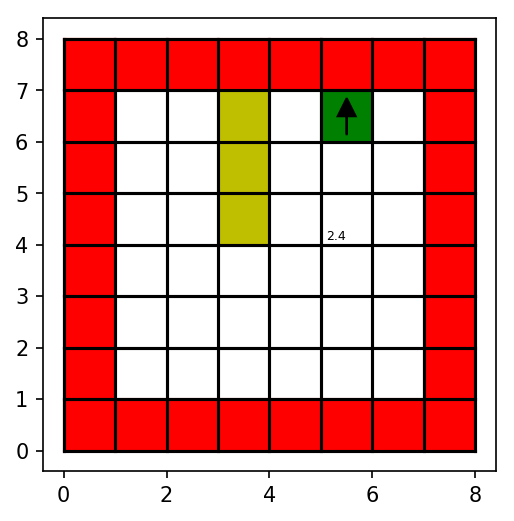

In [11]:
 def plot_grid():
    plt.rcParams['figure.dpi'] = 150
    fig = plt.figure()
    ax=fig.add_subplot(111)
    plt.axis([0,W-1,0,L-1])
    for i in range(W+1):
        plt.plot([0,L],[i,i],'k')
    for i in range(L+1):
        plt.plot([i,i],[0,W],'k')
    plt.axis('equal')
    plt.gca().set_aspect('equal', adjustable='box')
    for x in range(W):
        ax.add_patch(patches.Rectangle((x,0),1,1,color='r'))
        ax.add_patch(patches.Rectangle((x,7),1,1,color='r'))
    for y in range(L):
        ax.add_patch(patches.Rectangle((0,y),1,1,color='r'))
        ax.add_patch(patches.Rectangle((7,y),1,1,color='r'))
    ax.add_patch(patches.Rectangle((3,4),1,1,color='y'))
    ax.add_patch(patches.Rectangle((3,5),1,1,color='y'))
    ax.add_patch(patches.Rectangle((3,6),1,1,color='y'))
    ax.add_patch(patches.Rectangle((5,6),1,1,color='g'))

def plot_arrow(x,y,h):
#     x = 5
#     y = 6
#     h = 11
    l = 0.35

    ang = 2*np.pi/12*h
    yl = l*np.cos(ang)
    xl = l*np.sin(ang)
    arrow_len = 0.35
    plt.arrow(x+0.5-xl, y+0.5-yl,xl , yl, head_width=arrow_len, head_length=arrow_len, fc='k', ec='k')
def plot_text(x,y,s):
#     x = 5
#     y = 6
#     h = 11
    l = 0.35

    
    arrow_len = 0.35
    plt.text(x+0.1, y+0.1,s,fontsize=6)
    
plot_grid()
plot_arrow(5,6,0)
plot_text(5,4,2.4)
plt.show()
    

In [12]:
def calc_prob_matrix(pe):
    P = np.zeros((len(state_space),len(action_space),len(state_space)))
    for si in range(len(state_space)):
        for ai in range(len(action_space)):
            for sdi in range(len(state_space)):
                s = index_to_state(si)
                a = index_to_action(ai)
                sd = index_to_state(sdi)
                P[si,ai,sdi] = calc_prob_sa_to_sd(pe,s,a,sd)
    return P

pe = 0
P = calc_prob_matrix(pe)                                

In [13]:
def calc_reward_matrix():
    R = np.zeros((len(state_space),))
    for si in range(len(state_space)):
                s = index_to_state(si)
                R[si] = get_reward(s)
    return R

R = calc_reward_matrix()                                

[1, 6, 6] [-1, 1]
[1, 7, 7] [-1, 1]
[2, 7, 8] [-1, 1]
[3, 7, 9] [-1, 1]
[4, 7, 10] [-1, 0]
[5, 7, 10] [-1, 1]


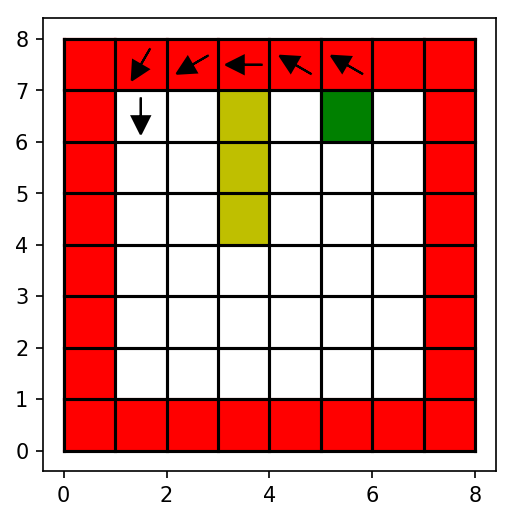

In [14]:
horizon = 100
def run_plot_policy(Pi,s0,pe):
    plot_grid()
    si = state_to_index(s0)
    for i in range(horizon):
#         print(i,si)
        ai = Pi[si]
        a = index_to_action(ai)
        s = index_to_state(si)
#         traj.append(s)
        print(s,a)
        if a[0]!=0:
            plot_arrow(s[0],s[1],s[2])
        sd = move(pe,s,a)
#         print(s,sd)
        si = int(state_to_index(sd))
        
        
        if sd[0] == goal[0] and sd[1] == goal[1]:
            break
    plt.show()
    return 
    
traj3c = run_plot_policy(pi0,[1,6,6],0)

In [15]:
def calc_P_Pi(P,Pi):
    P_Pi = np.zeros((len(state_space),len(state_space)))
    for si in range(len(state_space)):
            P_Pi[si,:] = P[si,Pi[si],:]
    return P_Pi
P_pi0 = calc_P_Pi(P,pi0)

In [16]:
def eval_policy(P,R,P_Pi,lb):
    V = np.copy(R)
    for itr in range(500):
        V = R + lb * P_Pi@V  
    return V
lb = 0.9
V = eval_policy(P,R,P_pi0,lb)

0


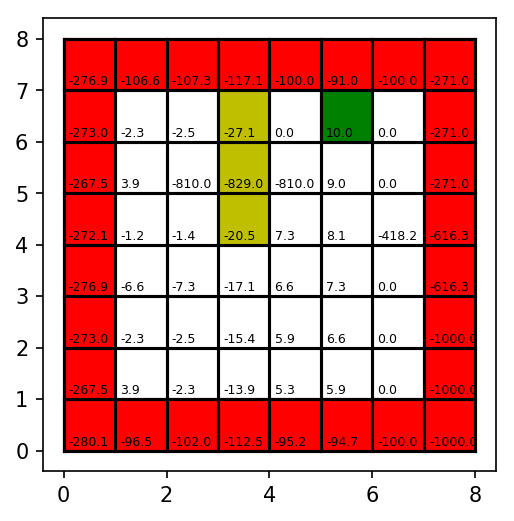

1


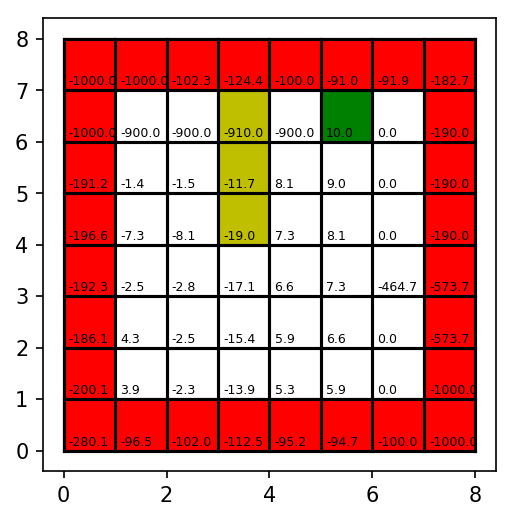

2


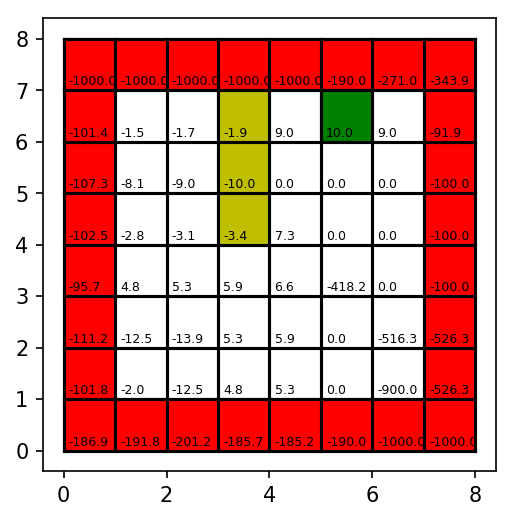

3


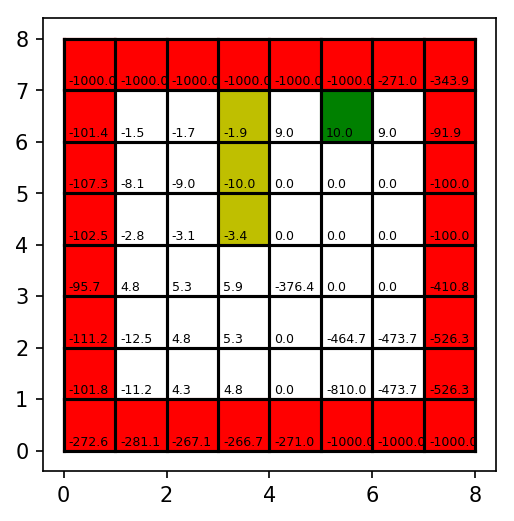

4


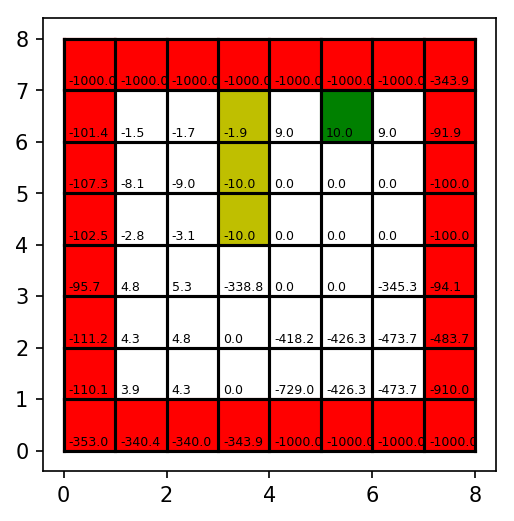

5


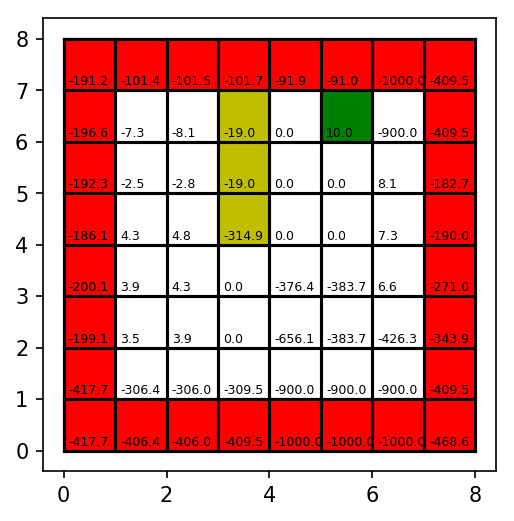

6


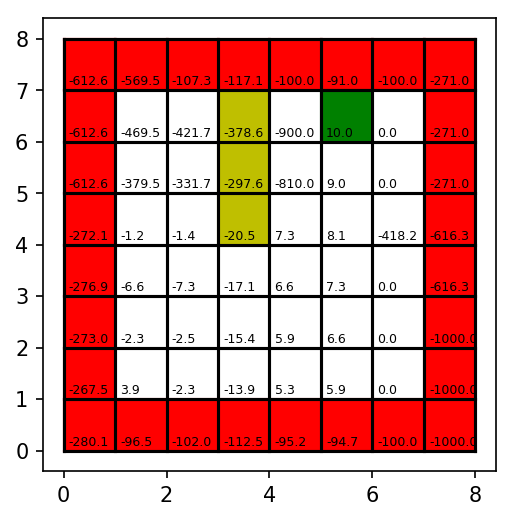

7


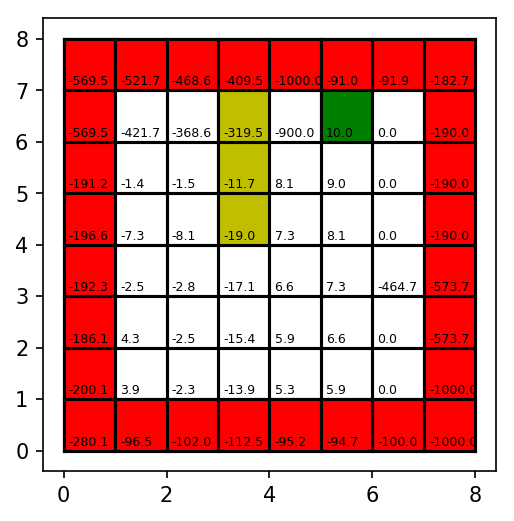

8


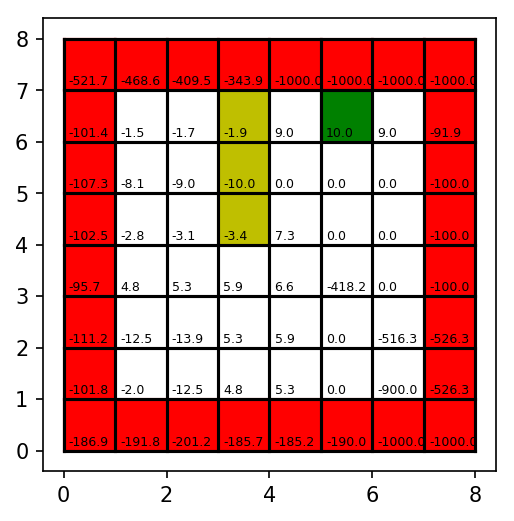

9


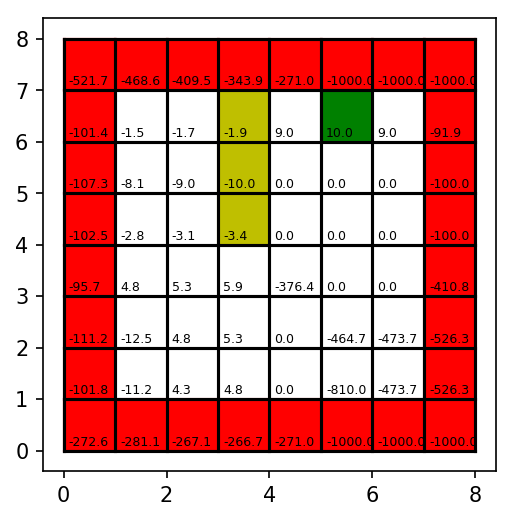

10


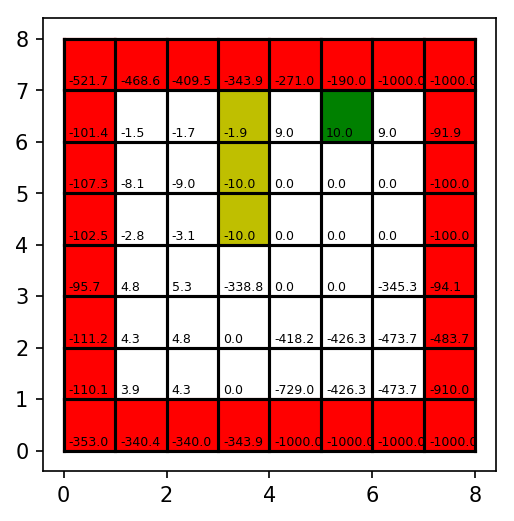

11


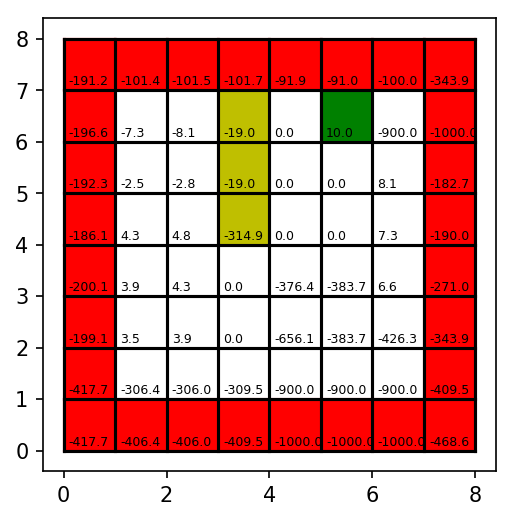

In [17]:
def plot_V(V):
    for hr in range(H):
        print(hr)
        plt.figure()
        plot_grid()
        for i in range(V.shape[0]):
            [x,y,h] = index_to_state(i)
            if h==hr:
                plot_text(x,y,"{:3.1f}".format(V[i]))
        plt.show()
plot_V(V)

In [18]:
# 3c?

In [19]:
def get_Pi_from_V(V,P):
    Pi = np.zeros((len(state_space),))
    
    Vp = P@(R+lb*V)
    Pi = np.argmax(Vp,axis = -1)
    return Pi
Pi  = get_Pi_from_V(V,P)

In [20]:
# def run_policy_iteration(P,pi0):
#     for i in range(10):
#         P_pi = calc_P_Pi(P,pi0)
#         V = eval_policy(P,R,P_pi0,lb)
#         pi0 = get_Pi_from_V(V,P)
        
#     return pi0
# pi1  = run_policy_iteration(P,pi0)

In [29]:
def run_policy_iteration(P,pi):
    for i in range(1):
        P_pi = calc_P_Pi(P,pi)
        V = eval_policy(P,R,P_pi,lb)
        pi = get_Pi_from_V(V,P)
    return pi,V
# pir = np.random.randint(0,len(action_space),(len(state_space),))
Pi_star, V_star  = run_policy_iteration(P,pi0)

[1, 6, 6] [1, 1]
[1, 5, 7] [1, -1]
[1, 4, 6] [1, -1]
[1, 3, 5] [1, -1]
[2, 3, 4] [1, -1]
[3, 3, 3] [1, -1]
[4, 3, 2] [1, -1]
[4, 4, 1] [1, 0]
[4, 5, 1] [1, 1]
[5, 5, 2] [-1, -1]
[5, 4, 1] [1, -1]
[5, 5, 0] [1, -1]


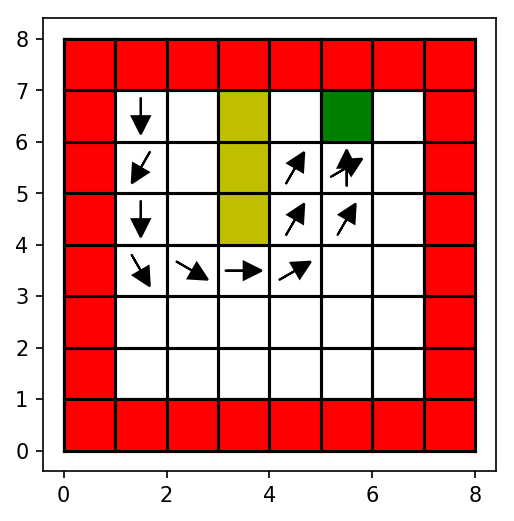

In [30]:
traj3c = run_plot_policy(Pi_star,[1,6,6],0)

0


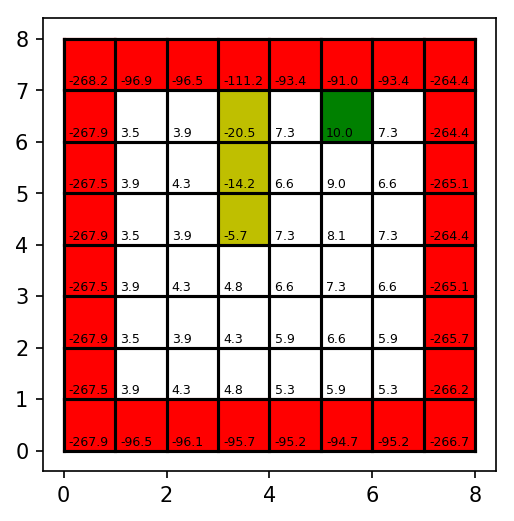

1


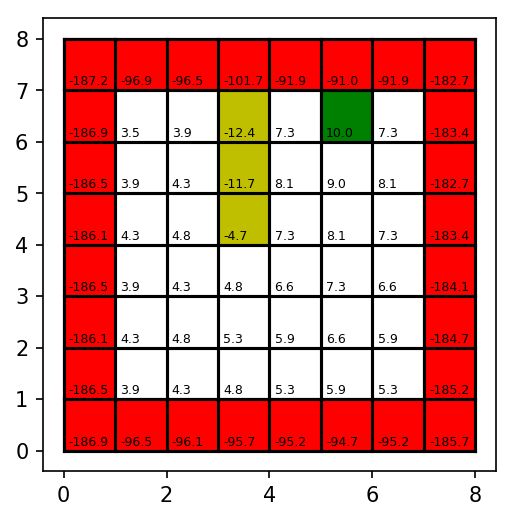

2


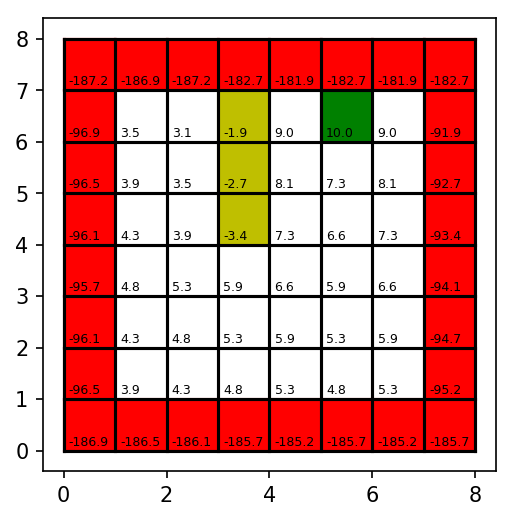

3


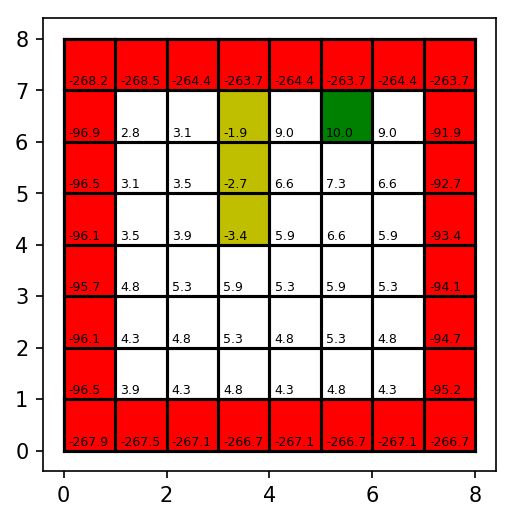

4


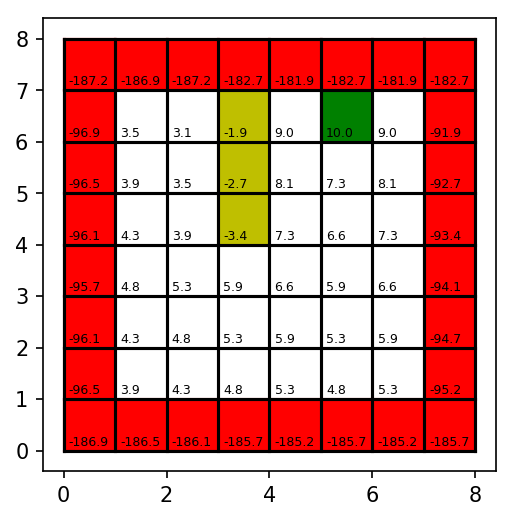

5


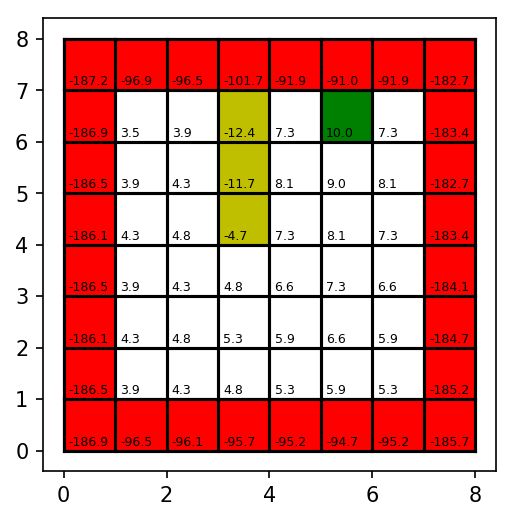

6


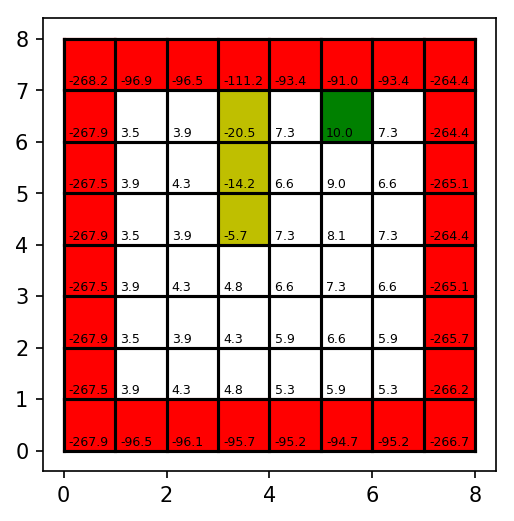

7


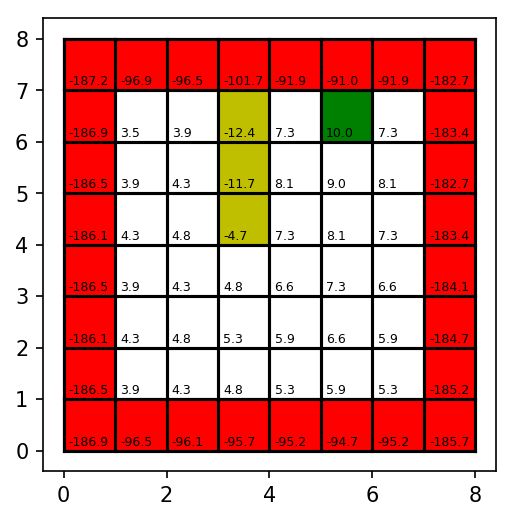

8


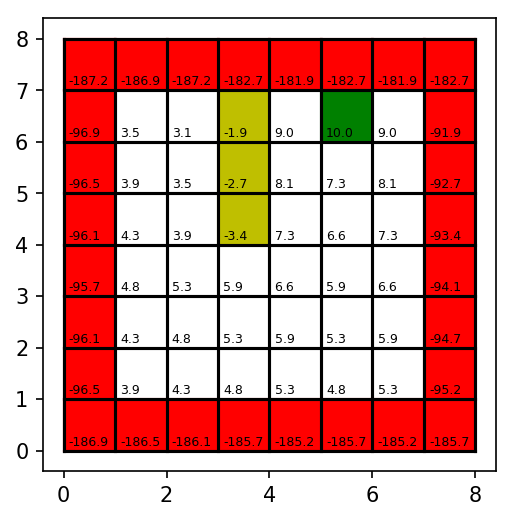

9


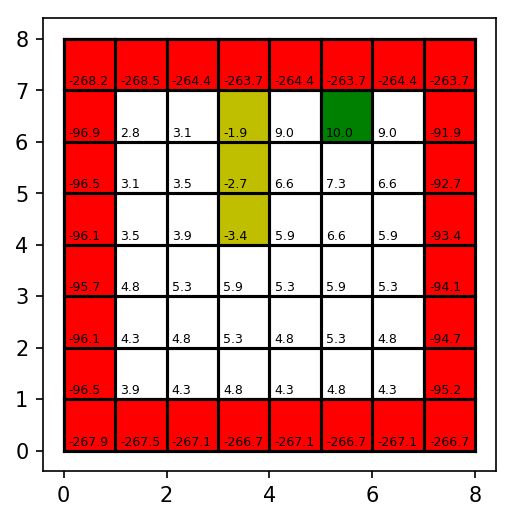

10


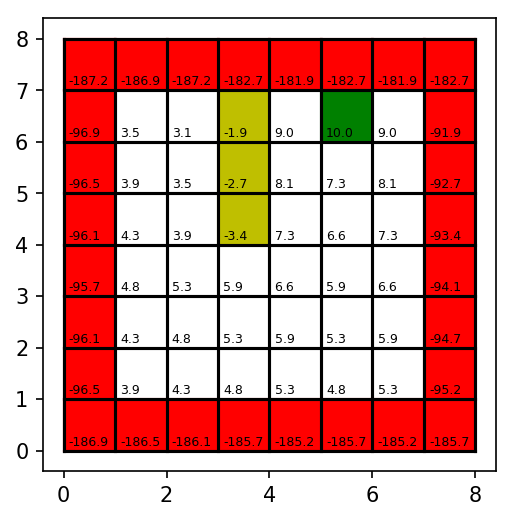

11


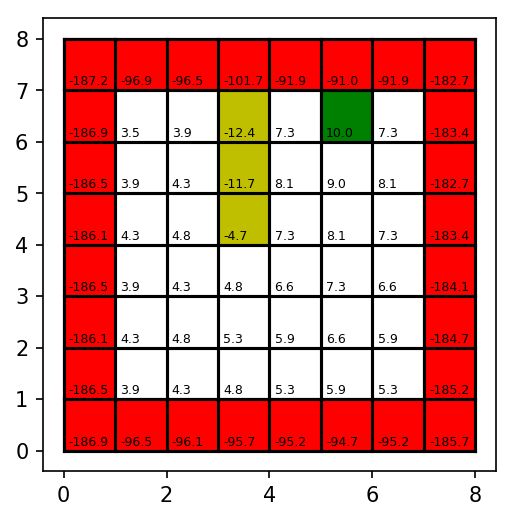

In [23]:
plot_V(V_star)